# Lesson 06 
# Aeden Jameson

## Best Practices for Assignments & Milestones

- <b>Break the assignment into sections - one section per numbered requirement.</b> Each assignment has numbered requirements/instructions e.g. "1. Read the CIFAR-10 dataset". Each requirement should have at least one markdown cell and at least one code cell. Feel free to combine sections or make other sensible changes if that makes sense for your code and is still clear. The intent is to give you a useful structure and to make sure you get full credit for your work.

- <b>Break the milestone into sections - one section for each item in the rubric.</b> Each milestone has rubric items e.g. "5. Handle class imbalance problem". Each rubric item should have at least one markdown cell and at least one code cell. Feel free to combine sections or make other sensible changes if that makes sense for your code and is still clear. The intent is to give you a useful structure and to make sure you get full credit for your work.

- <b>Include comments, with block comments preferred over in-line comments.</b> A good habit is to start each code cell with comments.

The above put into a useful pattern:

<b>Markdown cell:</b> Requirement #1: Read the CIFAR-10 dataset<br>
<b>Code cell:</b>: Comments followed by code<br>
<b>Markdown cell:</b> Requirement #2: Explore the data<br>
<b>Code cell:</b>: Comments followed by code<br>
<b>Markdown cell:</b> Requirement #3: Preprocess the data and prepare for classification<br>
<b>Code cell:</b>: Comments followed by code<br>

For more information:
- A good notebook example: [DataFrame Basics](https://github.com/Tanu-N-Prabhu/Python/blob/master/Pandas/Pandas_DataFrame.ipynb) 
- More example notebooks: [A gallery of interesting Jupyter Notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#pandas-for-data-analysis)
- [PEP 8 on commenting](https://www.python.org/dev/peps/pep-0008/)
- [PEP 257 - docstrings](https://www.python.org/dev/peps/pep-0257/)

Occasionally an assignment or milestone will ask you to do something other than write Python code e.g. ask you turn in a .docx file. In which case, please use logical structuring, but the specific notes above may not apply.

## Step 1: Read & Prepare the Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from pandas.plotting import scatter_matrix
import scipy.stats as ss

plt.rc('font', size=14) 
sns.set(style="ticks", color_codes=True)

#### Load & Prepare

In [3]:
def prepare(fileName = "https://library.startlearninglabs.uw.edu/DATASCI420/2019/Datasets/Bank%20Data.csv"):
    # data = pd.read_csv(fileName, comment='#', header=None)
    data = pd.read_csv(fileName)
    
    data['sex'] = data['sex'].astype('category')
    data['region'] = data['region'].astype('category')
    data['married'] = data['married'].astype('category')
    data['children'] = data['children'].astype('category')
    data['car'] = data['car'].astype('category')
    data['save_act'] = data['save_act'].astype('category')
    data['current_act'] = data['current_act'].astype('category')
    data['mortgage'] = data['mortgage'].astype('category')
    data['pep'] = data['pep'].astype('category')
  
    return data

customers = prepare()
print('Prepared...')

Prepared...


In [4]:
customers.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          600 non-null    int64   
 1   sex          600 non-null    category
 2   region       600 non-null    category
 3   income       600 non-null    float64 
 4   married      600 non-null    category
 5   children     600 non-null    category
 6   car          600 non-null    category
 7   save_act     600 non-null    category
 8   current_act  600 non-null    category
 9   mortgage     600 non-null    category
 10  pep          600 non-null    category
dtypes: category(9), float64(1), int64(1)
memory usage: 15.8 KB


In [6]:
customers.isnull().any(axis = 0)

age            False
sex            False
region         False
income         False
married        False
children       False
car            False
save_act       False
current_act    False
mortgage       False
pep            False
dtype: bool

## Step 2: Perform a brief exploratory analysis

#### Check for Imbalance of the Target

In [7]:
customers['pep'].value_counts()

NO     326
YES    274
Name: pep, dtype: int64

**Conclusion**: While not perfectly 50/50 the target of the dataset is balanced for practical purposes.

#### Summary Stats

In [8]:
customers.describe()

,age,income
count,600.000000,600.000000
mean,42.395000,27524.031217
std,14.424947,12899.468246
min,18.000000,5014.210000
25%,30.000000,17264.500000
50%,42.000000,24925.300000
75%,55.250000,36172.675000
max,67.000000,63130.100000


#### Distributional Observations

##### Numeric Variables

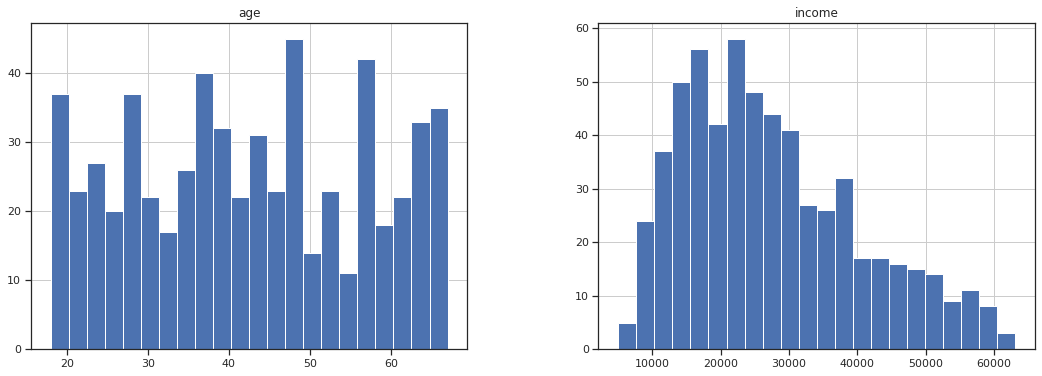

In [9]:
columns_for_hist = ['age','income']
customers[columns_for_hist].hist(bins=22, figsize=(18, 6), layout=(1,2));

##### Categorical Variables

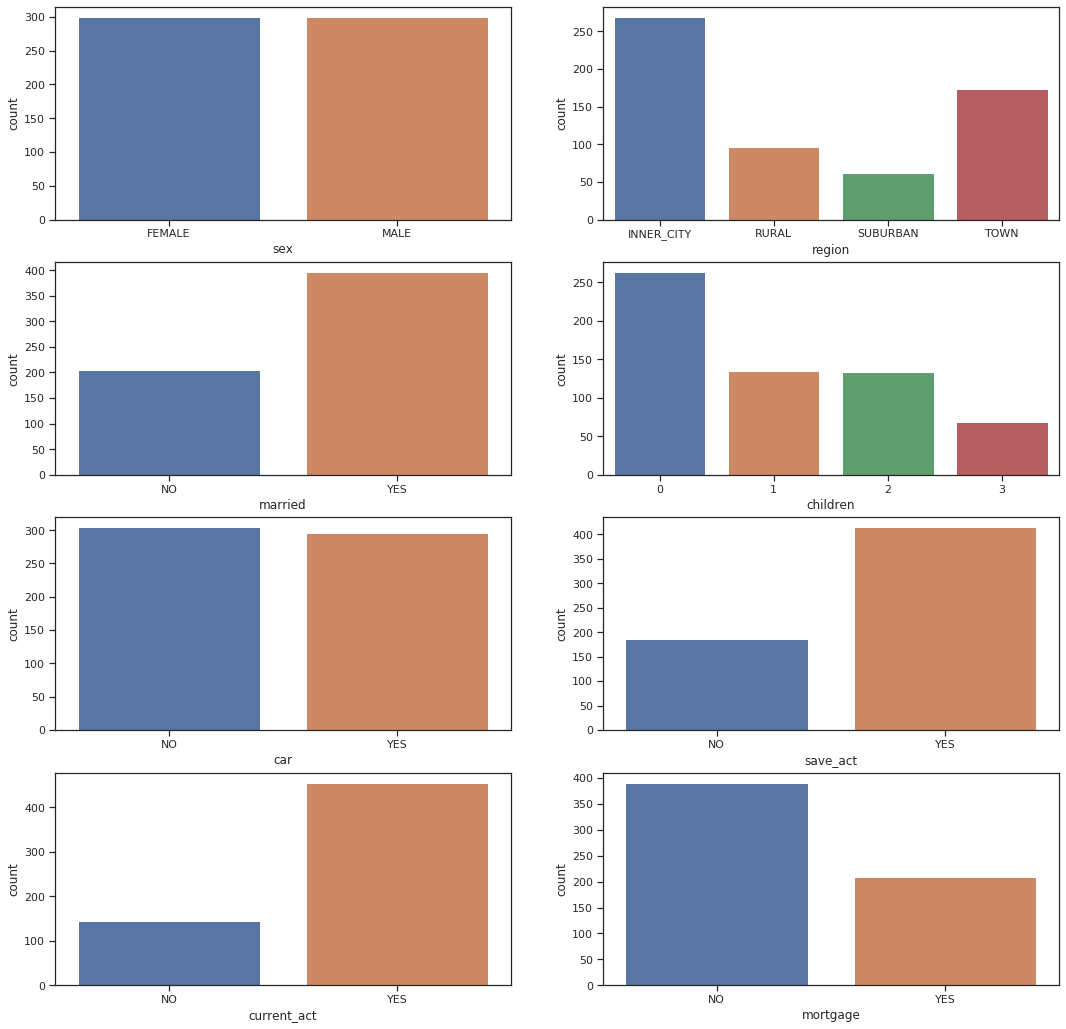

In [10]:
cols_for_barplots = ['sex','region','married','children','car','save_act','current_act','mortgage']
fig, ax = plt.subplots(4, 2, squeeze=True, figsize=(18, 18))
for col, subplot in zip(cols_for_barplots, ax.flatten()):
    sns.countplot(x=col, data=customers, ax=subplot)

***Observations***

* Most customers are married with children.
* Most customers live in the inner city.
* Income is skews right and so if it's selected as a feature we would want to take the log of the income and then bin it.

## Step 3: Compare Accuracy of Decision Tree & Random Forest

In [11]:
!pip install category_encoders

### Encode Data

In [12]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce


customers_enc = customers.copy()
for col in ['sex','married','car','save_act','current_act','mortgage','pep']:
    le = LabelEncoder()
    customers_enc[col] = le.fit_transform(customers[col])


handle = 'value' # options are: 'error', 'return_nan', 'value', and 'indicator'
onehoter =  ce.OneHotEncoder(return_df = True, 
                             cols = ["region", "children"], 
                             drop_invariant = True,
                             use_cat_names = True, 
                             handle_missing = handle, 
                             handle_unknown = handle)

customers_enc = onehoter.fit_transform(customers_enc)
customers_enc.head()

,age,sex,region_INNER_CITY,region_TOWN,region_RURAL,region_SUBURBAN,income,married,children_1.0,children_3.0,children_0.0,children_2.0,car,save_act,current_act,mortgage,pep
0,48,0,1,0,0,0,17546.0,0,1,0,0,0,0,0,0,0,1
1,40,1,0,1,0,0,30085.1,1,0,1,0,0,1,0,1,1,0
2,51,0,1,0,0,0,16575.4,1,0,0,1,0,1,1,1,0,0
3,23,0,0,1,0,0,20375.4,1,0,1,0,0,0,0,1,0,0
4,57,0,0,0,1,0,50576.3,1,0,0,1,0,0,1,0,0,0


### Decision Tree

In [13]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y,nfolds, criteria):
    param_grid = { 'max_depth': np.arange(3, 15), 'min_samples_leaf':np.arange(2, 6)}
    # decision tree model
    dtree_model=DecisionTreeClassifier(criterion=criteria)
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    
    return dtree_gscv.best_params_

def report_best(X, y, X_tst, y_tst, nfolds, criteria, lbls):    
    best_params = dtree_grid_search(X, y, nfolds, criteria)
    print(f'Best Params: {best_params}')
    classifier = DecisionTreeClassifier(criterion=criteria, 
                                               max_depth=best_params['max_depth'], 
                                               min_samples_leaf=best_params['min_samples_leaf'])
    classifier.fit(X_train, y_train)
    y_ent_pred = classifier.predict(X_tst)
    print("Entropy accuracy is : {}%".format(accuracy_score(y_tst, y_ent_pred)*100))
    print(classification_report(y_tst, y_ent_pred, target_names=lbls))

labels=['Yes','No']

In [14]:
X = customers_enc.drop(columns = ["age","income","pep"])
Y = customers_enc["pep"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 99)

#### Hyper Parameter Search Under Entroy

In [15]:
for x in range (1, 10):
    print(f'Trial {x}')
    report_best(X_train, y_train, X_test, y_test, 5, 'entropy', labels)

Trial 1
Best Params: {'max_depth': 8, 'min_samples_leaf': 2}
Entropy accuracy is : 64.16666666666667%
              precision    recall  f1-score   support

         Yes       0.66      0.71      0.69        66
          No       0.61      0.56      0.58        54

    accuracy                           0.64       120
   macro avg       0.64      0.63      0.63       120
weighted avg       0.64      0.64      0.64       120

Trial 2
Best Params: {'max_depth': 13, 'min_samples_leaf': 2}
Entropy accuracy is : 66.66666666666666%
              precision    recall  f1-score   support

         Yes       0.68      0.74      0.71        66
          No       0.65      0.57      0.61        54

    accuracy                           0.67       120
   macro avg       0.66      0.66      0.66       120
weighted avg       0.66      0.67      0.66       120

Trial 3
Best Params: {'max_depth': 7, 'min_samples_leaf': 2}
Entropy accuracy is : 65.0%
              precision    recall  f1-score   suppor

#### Hyper Parameter Search Under Gini

In [16]:
for x in range (1, 30):
    print(f'Trial {x}')
    report_best(X_train, y_train, X_test, y_test, 5, 'gini', labels)

Trial 1
Best Params: {'max_depth': 5, 'min_samples_leaf': 4}
Entropy accuracy is : 76.66666666666667%
              precision    recall  f1-score   support

         Yes       0.77      0.82      0.79        66
          No       0.76      0.70      0.73        54

    accuracy                           0.77       120
   macro avg       0.77      0.76      0.76       120
weighted avg       0.77      0.77      0.77       120

Trial 2
Best Params: {'max_depth': 5, 'min_samples_leaf': 5}
Entropy accuracy is : 76.66666666666667%
              precision    recall  f1-score   support

         Yes       0.77      0.82      0.79        66
          No       0.76      0.70      0.73        54

    accuracy                           0.77       120
   macro avg       0.77      0.76      0.76       120
weighted avg       0.77      0.77      0.77       120

Trial 3
Best Params: {'max_depth': 5, 'min_samples_leaf': 4}
Entropy accuracy is : 76.66666666666667%
              precision    recall  f1-sc

### Random Forest

In [30]:
from sklearn.model_selection import GridSearchCV
import numpy as np

hypers = {"n_estimators": [100], "max_features": ["sqrt", "log2"], "max_depth": np.arange(15,20), "min_samples_leaf": np.arange(4,10)}
model = RandomForestClassifier(random_state = 0, n_jobs = -1)
rforest_gscv = GridSearchCV(model, hypers, cv=5)
rforest_gscv.fit(X_train, y_train)

print(rforest_gscv.best_params_)

{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'n_estimators': 100}


In [31]:
from sklearn.metrics import accuracy_score

hypers = {"n_estimators": 100, "max_features": "sqrt", "max_depth": 15, "min_samples_leaf": 6}
clf_rf = RandomForestClassifier(random_state = 0, verbose = True, **hypers)
clf_rf.fit(X_train, y_train)
y_hat = clf_rf.predict(X_test)

acc = accuracy_score(y_test, y_hat)
print("Accuracy is : {}%".format(acc*100))

Accuracy is : 77.5%


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


#### Conclusion

The best performing decision tree with the hyper parameters of `{'max_depth': 5, 'min_samples_leaf': 4}` using the Gini criterion was **76.67%** accurate. The best performing random forest I could find wasn't much better. The random forest with hyper parameters of `{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'n_estimators': 100}` was **77.5%** accurate. With a little more time I wonder if bin income and or age and turning it into a categorical variable could have improved things.

## Step 4: Graph Decision Tree

**WARNING**: You probably don't need to run the next box, but I did probably because of how I'm running things. My environment is probably very different from most, I'm running Jupyter under a Docker container on a Linux box. 

In [32]:
!sudo apt-get update;
!sudo apt-get -y install graphviz;
print('Done installing... ')

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease  
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 252 kB in 1s (199 kB/s)    
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 50 not upgraded.
Done installing... 


In [33]:
import os
from sklearn import tree
from IPython.display import Image

def show_tree(out_name, model, feature_names, w, h):
    dotfile = open(out_name + ".dot", 'w')
    tree.export_graphviz(model, out_file = dotfile, filled = True, rounded = True, feature_names = feature_names)
    dotfile.close()

    #os.environ["PATH"] += os.pathsep + graphviz_path
    os.system('dot -Tpng {}.dot -o {}.png'.format(out_name, out_name))

    return(Image(filename = out_name + '.png', width = w, height = h))

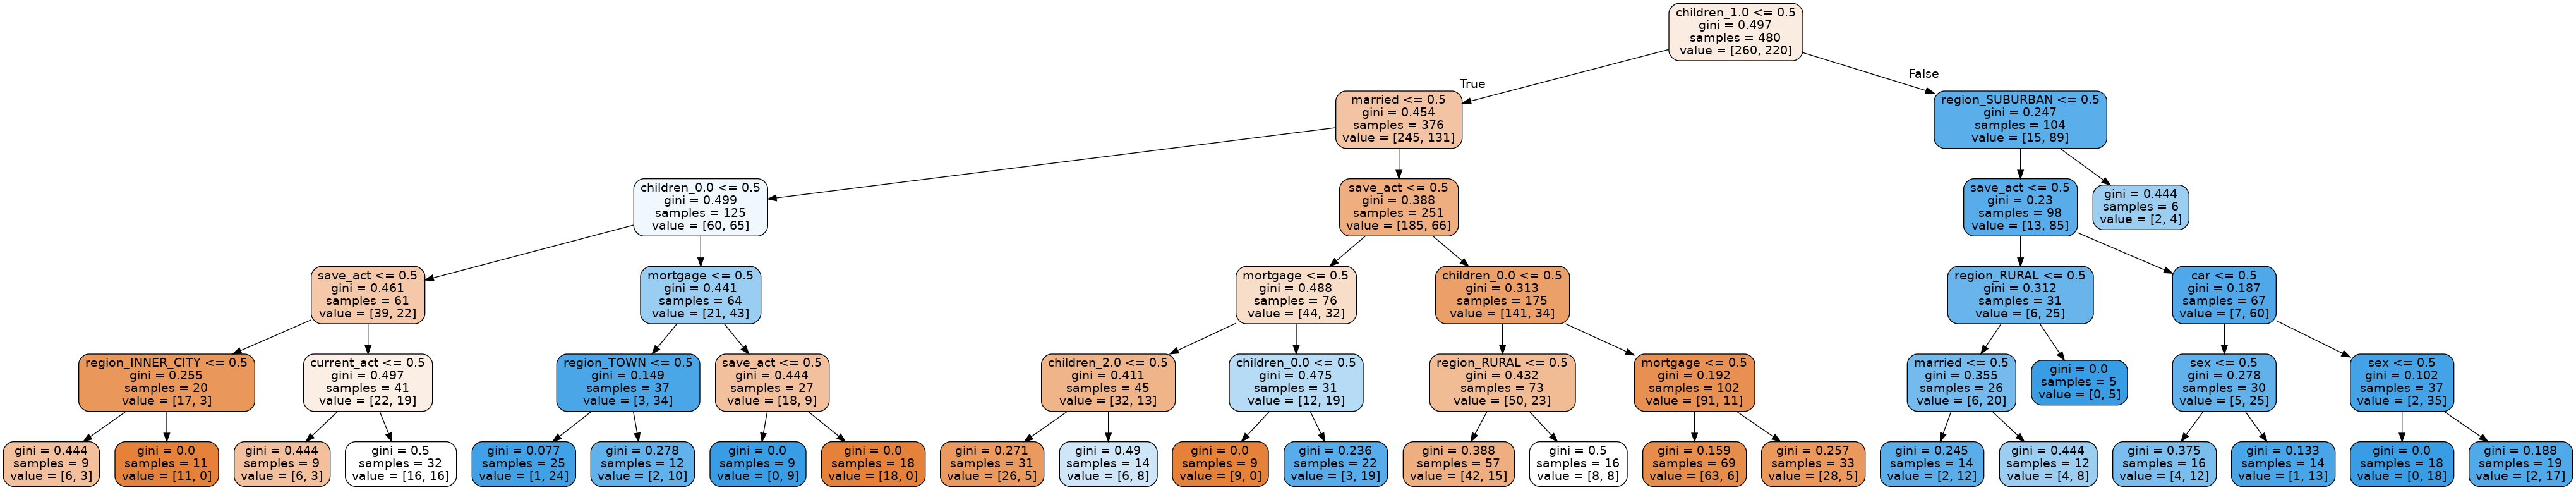

In [34]:
opt_entropy_tree = DecisionTreeClassifier(criterion = 'gini', max_depth=5, min_samples_leaf=4).fit(X_train, y_train)
show_tree('dtree_under_entropy', opt_entropy_tree, X_train.columns, 750, 750)

## Step 5: Graph the Confusion Matrix of your Random Forest Model

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


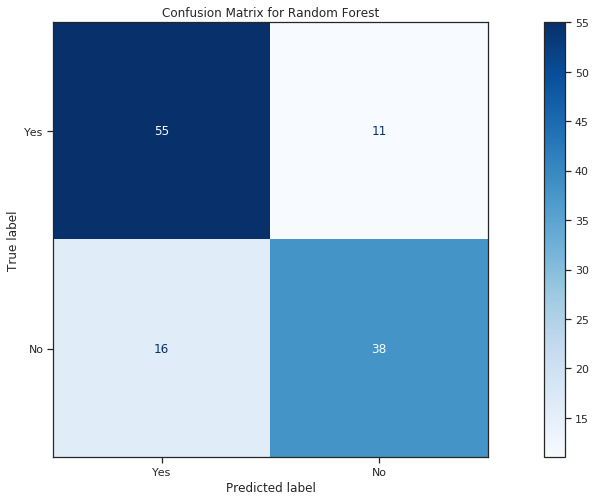

In [39]:
fig, axs = plt.subplots(1, 1, squeeze=True, figsize=(20, 8))
conf_plot = plot_confusion_matrix(clf_rf, X_test, y_test, display_labels=labels, cmap=plt.cm.Blues, ax=axs);
conf_plot.ax_.set_title("Confusion Matrix for Random Forest");